In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from scipy.spatial import ConvexHull
from sklearn.preprocessing import StandardScaler

For URA in the test set

In [4]:
with open('../data_for_classifier/AGdata031119.pkl','rb') as f:
    AG_geneIDs, AGdata_outcome, AGdata_clean,X, y, X_train, X_test, y_train, y_test,AG_geneIDs_test, AG_geneIDs_train = pickle.load(f)


X = StandardScaler().fit_transform(AGdata_clean)

y = AGdata_outcome
X_test = X[(AG_geneIDs.Experiment=="D39_URA")  | (AG_geneIDs.Experiment=="T4_PEN")  | 
           (AG_geneIDs.Experiment=="T4_CIP") | (AG_geneIDs.Experiment=='19F_CIP'),:]
X_train = X[(AG_geneIDs.Experiment!="D39_URA")  & (AG_geneIDs.Experiment!="T4_PEN") & 
            (AG_geneIDs.Experiment!="T4_CIP") & (AG_geneIDs.Experiment!='19F_CIP') ,:]

y_test = y[(AG_geneIDs.Experiment=="D39_URA")  | (AG_geneIDs.Experiment=="T4_PEN")  | 
           (AG_geneIDs.Experiment=="T4_CIP") | (AG_geneIDs.Experiment=='19F_CIP') ]
y_train = y[(AG_geneIDs.Experiment!="D39_URA")  & (AG_geneIDs.Experiment!="T4_PEN") & 
            (AG_geneIDs.Experiment!="T4_CIP") & (AG_geneIDs.Experiment!='19F_CIP')]

AG_geneIDs_test = AG_geneIDs.loc[(AG_geneIDs.Experiment=="D39_URA")  | (AG_geneIDs.Experiment=="T4_PEN")  | 
                                 (AG_geneIDs.Experiment=="T4_CIP") | (AG_geneIDs.Experiment=='19F_CIP'),:]
AG_geneIDs_train = AG_geneIDs.loc[(AG_geneIDs.Experiment!="D39_URA")  & (AG_geneIDs.Experiment!="T4_PEN") & 
                                  (AG_geneIDs.Experiment!="T4_CIP") & (AG_geneIDs.Experiment!='19F_CIP'),:]


with open('../predictors/URAtest0319/noDropout/predictors_withMOA_RIFtrain.pkl','rb') as f:
    DT_clf, LR_clf, SVM_clf, KNN_clf, RF_clf, MLP_clf = pickle.load(f)
    
Cons_test = pd.read_csv('../predictors/URAtest0319/noDropout/Consensus_vote_test.csv')
Cons_train = pd.read_csv('../predictors/URAtest0319/noDropout/Consensus_vote_train.csv')

D:\defne\Apps\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype bool, uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype bool, uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [5]:
DT_train_fpr, DT_train_tpr, _ = roc_curve(y_train, DT_clf.best_estimator_.predict_proba(X_train)[:,1])
DT_test_fpr, DT_test_tpr, _ = roc_curve(y_test, DT_clf.best_estimator_.predict_proba(X_test)[:,1])

DT_train_rocpoints = np.array([DT_train_fpr, DT_train_tpr])
DT_test_rocpoints = np.array([DT_test_fpr, DT_test_tpr])

DT_train_hull = ConvexHull(np.transpose(DT_train_rocpoints))
DT_test_hull = ConvexHull(np.transpose(DT_test_rocpoints))

DT_train_hull = np.sort(DT_train_hull.vertices)
DT_test_hull = np.sort(DT_test_hull.vertices)

In [6]:
LR_train_fpr, LR_train_tpr, _ = roc_curve(y_train, LR_clf.best_estimator_.predict_proba(X_train)[:,1])
LR_test_fpr, LR_test_tpr, _ = roc_curve(y_test, LR_clf.best_estimator_.predict_proba(X_test)[:,1])

LR_train_rocpoints = np.array([LR_train_fpr, LR_train_tpr])
LR_test_rocpoints = np.array([LR_test_fpr, LR_test_tpr])

LR_train_hull = ConvexHull(np.transpose(LR_train_rocpoints))
LR_test_hull = ConvexHull(np.transpose(LR_test_rocpoints))

LR_train_hull = np.sort(LR_train_hull.vertices)
LR_test_hull = np.sort(LR_test_hull.vertices)

In [7]:
SVM_train_fpr, SVM_train_tpr, _ = roc_curve(y_train, SVM_clf.best_estimator_.predict_proba(X_train)[:,1])
SVM_test_fpr, SVM_test_tpr, _ = roc_curve(y_test, SVM_clf.best_estimator_.predict_proba(X_test)[:,1])

SVM_train_rocpoints = np.array([SVM_train_fpr, SVM_train_tpr])
SVM_test_rocpoints = np.array([SVM_test_fpr, SVM_test_tpr])

SVM_train_hull = ConvexHull(np.transpose(SVM_train_rocpoints))
SVM_test_hull = ConvexHull(np.transpose(SVM_test_rocpoints))

SVM_train_hull = np.sort(SVM_train_hull.vertices)
SVM_test_hull = np.sort(SVM_test_hull.vertices)

In [8]:
KNN_train_fpr, KNN_train_tpr, _ = roc_curve(y_train, KNN_clf.best_estimator_.predict_proba(X_train)[:,1])
KNN_test_fpr, KNN_test_tpr, _ = roc_curve(y_test, KNN_clf.best_estimator_.predict_proba(X_test)[:,1])

KNN_train_rocpoints = np.array([KNN_train_fpr, KNN_train_tpr])
KNN_test_rocpoints = np.array([KNN_test_fpr, KNN_test_tpr])

KNN_train_hull = ConvexHull(np.transpose(KNN_train_rocpoints))
KNN_test_hull = ConvexHull(np.transpose(KNN_test_rocpoints))

KNN_train_hull = np.sort(KNN_train_hull.vertices)
KNN_test_hull = np.sort(KNN_test_hull.vertices)

In [9]:
RF_train_fpr, RF_train_tpr, _ = roc_curve(y_train, RF_clf.best_estimator_.predict_proba(X_train)[:,1])
RF_test_fpr, RF_test_tpr, _ = roc_curve(y_test, RF_clf.best_estimator_.predict_proba(X_test)[:,1])

RF_train_rocpoints = np.array([RF_train_fpr, RF_train_tpr])
RF_test_rocpoints = np.array([RF_test_fpr, RF_test_tpr])

RF_train_hull = ConvexHull(np.transpose(RF_train_rocpoints))
RF_test_hull = ConvexHull(np.transpose(RF_test_rocpoints))

RF_train_hull = np.sort(RF_train_hull.vertices)
RF_test_hull = np.sort(RF_test_hull.vertices)

In [10]:
MLP_train_fpr, MLP_train_tpr, _ = roc_curve(y_train, MLP_clf.best_estimator_.predict_proba(X_train)[:,1])
MLP_test_fpr, MLP_test_tpr, _ = roc_curve(y_test, MLP_clf.best_estimator_.predict_proba(X_test)[:,1])

MLP_train_rocpoints = np.array([MLP_train_fpr, MLP_train_tpr])
MLP_test_rocpoints = np.array([MLP_test_fpr, MLP_test_tpr])

MLP_train_hull = ConvexHull(np.transpose(MLP_train_rocpoints))
MLP_test_hull = ConvexHull(np.transpose(MLP_test_rocpoints))

MLP_train_hull = np.sort(MLP_train_hull.vertices)
MLP_test_hull = np.sort(MLP_test_hull.vertices)

In [11]:
CON_train_fpr, CON_train_tpr, _ = roc_curve(y_train, Cons_train['MajVoteProb'])
CON_test_fpr, CON_test_tpr, _ = roc_curve(y_test, Cons_test['MajVoteProb'])

CON_train_rocpoints = np.array([CON_train_fpr, CON_train_tpr])
CON_test_rocpoints = np.array([CON_test_fpr, CON_test_tpr])

CON_train_hull = ConvexHull(np.transpose(CON_train_rocpoints))
CON_test_hull = ConvexHull(np.transpose(CON_test_rocpoints))

CON_train_hull = np.sort(CON_train_hull.vertices)
CON_test_hull = np.sort(CON_test_hull.vertices)


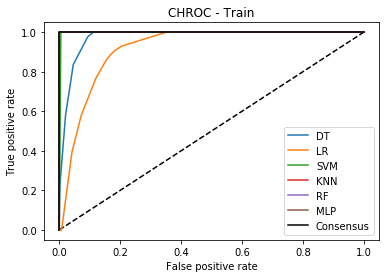

In [14]:
# plot CHROC
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(DT_train_fpr[DT_train_hull], DT_train_tpr[DT_train_hull], label='DT')
plt.plot(LR_train_fpr[LR_train_hull], LR_train_tpr[LR_train_hull], label='LR')
plt.plot(SVM_train_fpr[SVM_train_hull], SVM_train_tpr[SVM_train_hull], label='SVM')
plt.plot(KNN_train_fpr[KNN_train_hull], KNN_train_tpr[KNN_train_hull], label='KNN')
plt.plot(RF_train_fpr[RF_train_hull], RF_train_tpr[RF_train_hull], label='RF')
plt.plot(MLP_train_fpr[MLP_train_hull], MLP_train_tpr[MLP_train_hull], label='MLP')
plt.plot(CON_train_fpr[CON_train_hull], CON_train_tpr[CON_train_hull],'k' ,label='Consensus')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.title('CHROC - Train')

fig1 = plt.gcf()
plt.show()
fig1.savefig('../predictors/URAtest0319/noDropout/CHROC_Train.svg')

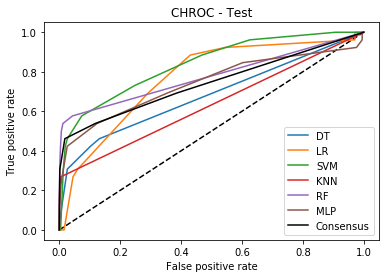

In [15]:
# plot CHROC
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(DT_test_fpr[DT_test_hull], DT_test_tpr[DT_test_hull], label='DT')
plt.plot(LR_test_fpr[LR_test_hull], LR_test_tpr[LR_test_hull], label='LR')
plt.plot(SVM_test_fpr[SVM_test_hull], SVM_test_tpr[SVM_test_hull], label='SVM')
plt.plot(KNN_test_fpr[KNN_test_hull], KNN_test_tpr[KNN_test_hull], label='KNN')
plt.plot(RF_test_fpr[RF_test_hull], RF_test_tpr[RF_test_hull], label='RF')
plt.plot(MLP_test_fpr[MLP_test_hull], MLP_test_tpr[MLP_test_hull], label='MLP')
plt.plot(CON_test_fpr[CON_test_hull], CON_test_tpr[CON_test_hull],'k' ,label='Consensus')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.title('CHROC - Test')

#plt.xlim(0, 0.01)
#plt.ylim(0,0.5)

fig1 = plt.gcf()
plt.show()
fig1.savefig('../predictors/URAtest0319/noDropout/CHROC_Test.svg')

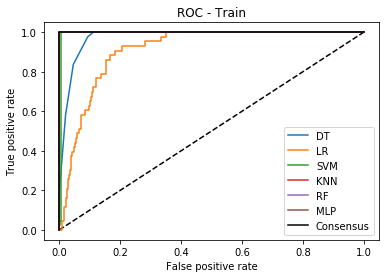

In [16]:
# plot ROC
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(DT_train_fpr, DT_train_tpr, label='DT')
plt.plot(LR_train_fpr, LR_train_tpr, label='LR')
plt.plot(SVM_train_fpr, SVM_train_tpr, label='SVM')
plt.plot(KNN_train_fpr, KNN_train_tpr, label='KNN')
plt.plot(RF_train_fpr, RF_train_tpr, label='RF')
plt.plot(MLP_train_fpr, MLP_train_tpr, label='MLP')
plt.plot(CON_train_fpr, CON_train_tpr,'k' ,label='Consensus')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.title('ROC - Train')

fig1 = plt.gcf()
plt.show()
fig1.savefig('../predictors/URAtest0319/noDropout/ROC_Train.svg')

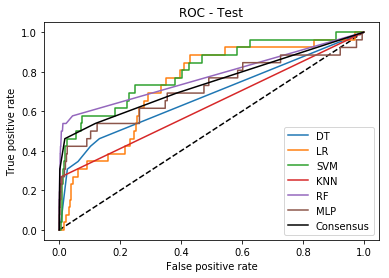

In [17]:
# plot ROC
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(DT_test_fpr, DT_test_tpr, label='DT')
plt.plot(LR_test_fpr, LR_test_tpr, label='LR')
plt.plot(SVM_test_fpr, SVM_test_tpr, label='SVM')
plt.plot(KNN_test_fpr, KNN_test_tpr, label='KNN')
plt.plot(RF_test_fpr, RF_test_tpr, label='RF')
plt.plot(MLP_test_fpr, MLP_test_tpr, label='MLP')
plt.plot(CON_test_fpr, CON_test_tpr,'k' ,label='Consensus')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.title('ROC - Test')

fig1 = plt.gcf()
plt.show()
fig1.savefig('../predictors/URAtest0319/noDropout/ROC_Test.svg')

## Learning Curves

In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm

In [19]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


In [22]:
DT_for_lc = DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')
LR_for_lc = LogisticRegression(C=0.0019306977288832496, class_weight='balanced',
          dual=False, fit_intercept=True, intercept_scaling=1,
          max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
          random_state=None, solver='warn', tol=0.0001, verbose=0,
          warm_start=False)
KNN_for_lc = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='distance')
SVM_for_lc = SVC(C=0.1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
RF_for_lc = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
MLP_for_lc = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)

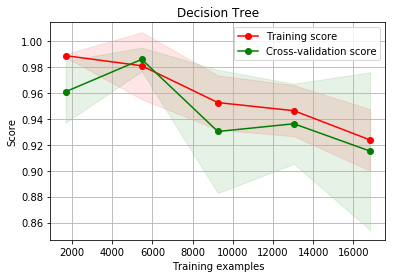

In [24]:
plot_learning_curve(DT_for_lc, "Decision Tree", X_train, y_train, cv = skf.split(X_train, y_train))
plt.gcf()
plt.savefig('../predictors/URAtest0319/noDropout/DT_LC.svg')

D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

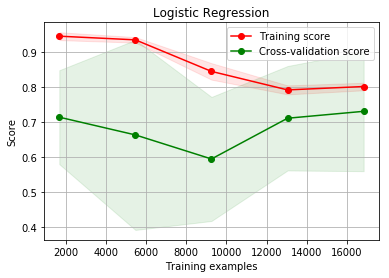

In [25]:
plot_learning_curve(LR_for_lc, "Logistic Regression", X_train, y_train, cv = skf.split(X_train, y_train))
plt.gcf()
plt.savefig('../predictors/URAtest0319/noDropout/LR_LC.svg')

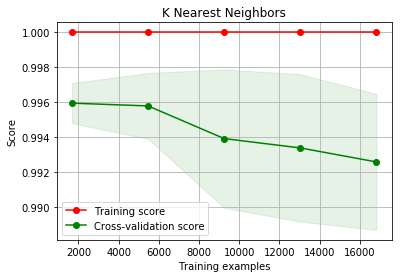

In [26]:
plot_learning_curve(KNN_for_lc, "K Nearest Neighbors", X_train, y_train, cv = skf.split(X_train, y_train))
plt.gcf()
plt.savefig('../predictors/URAtest0319/noDropout/KNN_LC.svg')

D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The 

D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\defne\Apps\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The 

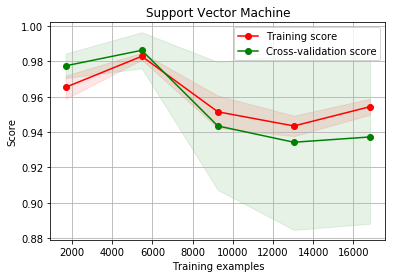

In [27]:
plot_learning_curve(SVM_for_lc, "Support Vector Machine", X_train, y_train, cv = skf.split(X_train, y_train))
plt.gcf()
plt.savefig('../predictors/URAtest0319/noDropout/SVM_LC.svg')

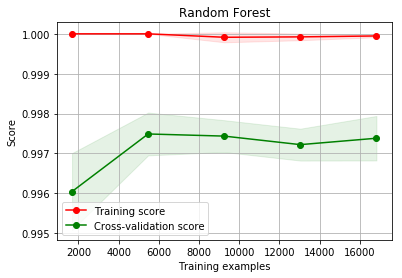

In [28]:
plot_learning_curve(RF_for_lc, "Random Forest", X_train, y_train, cv = skf.split(X_train, y_train))
plt.gcf()
plt.savefig('../predictors/URAtest0319/noDropout/RF_LC.svg')

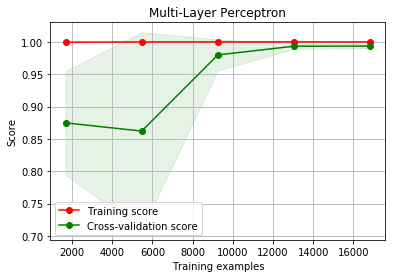

In [29]:
plot_learning_curve(MLP_for_lc, "Multi-Layer Perceptron", X_train, y_train, cv = skf.split(X_train, y_train))
plt.gcf()
plt.savefig('../predictors/URAtest0319/noDropout/MLPF_LC.svg')